# Diamond Price Prediction Using Feed Forward Neural Network

### Importing necessary modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Importing the dataset

In [2]:
dt_diamond=pd.read_csv('diamonds.csv')
dt_diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Since first column in the dataset is just the index, it will be dropped from our dataset. 

In [3]:
dt_diamond=dt_diamond.iloc[: , 1:]
dt_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Overview of the dataset

In [4]:
dt_diamond.shape

(53940, 10)

In [5]:
dt_diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
dt_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
dt_diamond.mean()

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

### Check and treat missing values using any deletion or data imputation techniques

In [8]:
dt_diamond.isnull()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


In [9]:
dt_diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

The dataset has no missing values.

### Data Visualisation

Plotting boxplot for each feature, price is plotted in individual boxplot because the range of numbers are too big from other features.

<AxesSubplot:ylabel='price'>

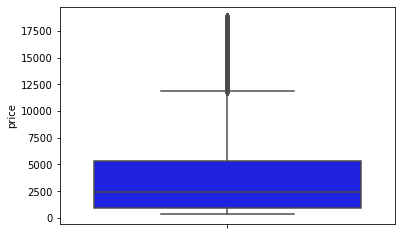

In [10]:
sns.boxplot(y=dt_diamond['price'],color='Blue')

<AxesSubplot:>

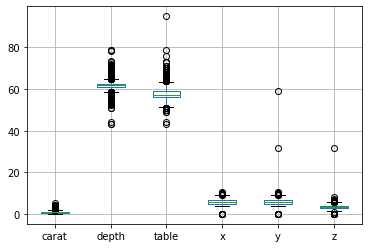

In [11]:
dt_diamond.boxplot(['carat','depth','table','x','y','z'])

From both plots, we can see that there are exist of outliers in each feature, hence, the outliers will be treated.

### Detection of Outliers – IQR approach

In [12]:
for x in ['carat','depth','price','table','x','y','z']:
    q75,q25 = np.percentile(dt_diamond.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dt_diamond.loc[dt_diamond[x] < min,x] = np.nan
    dt_diamond.loc[dt_diamond[x] > max,x] = np.nan

In [13]:
dt_diamond.isnull().sum()

carat      1889
cut           0
color         0
clarity       0
depth      2545
table       605
price      3540
x            32
y            29
z            49
dtype: int64

In [14]:
dt_diamond = dt_diamond.dropna(axis = 0)

In [15]:
dt_diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

All the outliers have been removed from our dataset

### Finding the correlation between the features and the label. 

<AxesSubplot:>

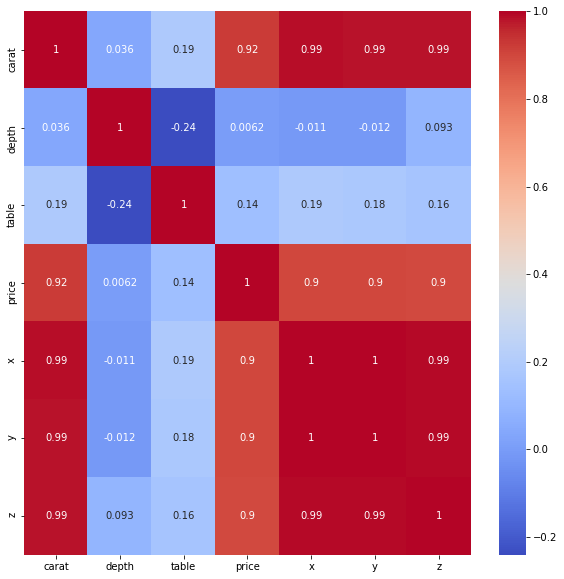

In [16]:
dt_diamond.corr
plt.figure(figsize=(10,10))
sns.heatmap(dt_diamond.corr(),cmap='coolwarm',annot=True)

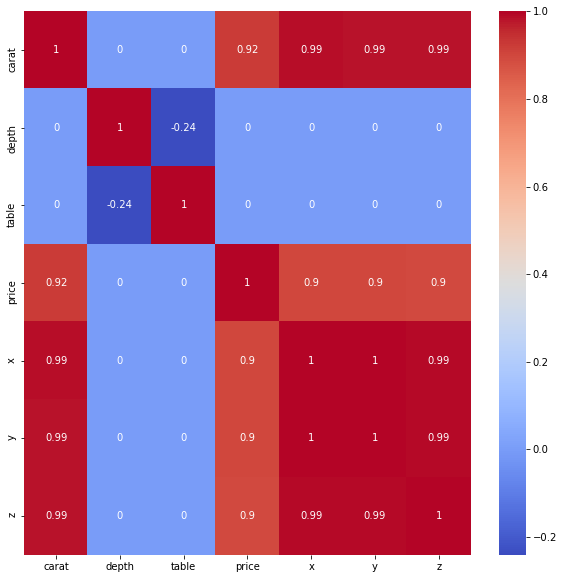

In [17]:
dt_diamond_corr = dt_diamond.corr()
dt_diamond_corr[np.abs(dt_diamond_corr)<.2] = 0
plt.figure(figsize=(10,10))
sns.heatmap(dt_diamond_corr,
            cmap='coolwarm',
            annot=True);

From the heatmap plot, the features with at least 0.2 correlation with Price are carat, x, y, and z. 

### Dropping depth and table features from our dataset

In [18]:
dt_diamond = dt_diamond.drop(columns=['depth','table'])
dt_diamond

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326.0,3.89,3.84,2.31
3,0.29,Premium,I,VS2,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,335.0,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,336.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757.0,6.15,6.12,3.74


### Fix price as our label or ouput variable

In [19]:
x = dt_diamond.drop(columns=["price"])
y = dt_diamond["price"]

### Encoding the categorical data 

In [20]:
from sklearn.preprocessing import OrdinalEncoder

cut_cat = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_cat = ["J", "I", "H", "G", "F", "E", "D"]
clarity_cat = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

In [21]:
oe = OrdinalEncoder(categories=[cut_cat, color_cat, clarity_cat])
x[["cut", "color", "clarity"]] = oe.fit_transform(x[["cut", "color", "clarity"]])

In [22]:
x

,carat,cut,color,clarity,x,y,z
0,0.23,4.0,5.0,1.0,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,3.89,3.84,2.31
3,0.29,3.0,1.0,3.0,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,4.34,4.35,2.75
5,0.24,2.0,0.0,5.0,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,4.0,6.0,2.0,5.75,5.76,3.50
53936,0.72,1.0,6.0,2.0,5.69,5.75,3.61
53937,0.70,2.0,6.0,2.0,5.66,5.68,3.56
53938,0.86,3.0,2.0,1.0,6.15,6.12,3.74


We can see that the features cut, color and clarity have been succesfully encoded.

### Splitting the dataset into training = 70%, validation = 15% and testing = 15%

In [23]:
from sklearn.model_selection import train_test_split

SEED = 12345

x_train, x_iter, y_train, y_iter = train_test_split(x, y, test_size=0.3, random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_iter, y_iter, test_size=0.5, random_state=SEED)

### Standardizing the dataset using StandardScaler

This process is crcucial because we want the data to be standardized in order to prevent any favour to any feature due to the imbalance of the range of number.

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_val_sc = sc.transform(x_val)
x_test_sc = sc.transform(x_test)

### Setting up the model of feed forward neural network

In [25]:
import tensorflow as tf

input_shape = x_train_sc.shape[-1]

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
    ])

model.summary()

model.compile(optimizer = "adam", loss="mse", metrics=["mse", "mae"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0

### Applying early stopping and do the model fitting

In [26]:
EPOCH = 30
BATCH_SIZE = 64

es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta = 10, patience = 4)

history = model.fit(x_train_sc, y_train, validation_data = (x_val_sc, y_val), epochs = EPOCH, batch_size = BATCH_SIZE, callbacks = [es])

Epoch 1/30
520/520 [==============================] - 8s 10ms/step - loss: 6123234.5000 - mse: 6123234.5000 - mae: 1573.7959 - val_loss: 831827.1250 - val_mse: 831827.1250 - val_mae: 623.7094
Epoch 2/30
520/520 [==============================] - 5s 10ms/step - loss: 2536673.5000 - mse: 2536673.5000 - mae: 1017.4683 - val_loss: 662406.7500 - val_mse: 662406.7500 - val_mae: 546.6848
Epoch 3/30
520/520 [==============================] - 5s 10ms/step - loss: 2436983.7500 - mse: 2436983.7500 - mae: 986.3102 - val_loss: 754094.1250 - val_mse: 754094.1250 - val_mae: 579.9456
Epoch 4/30
520/520 [==============================] - 5s 9ms/step - loss: 2429912.2500 - mse: 2429912.2500 - mae: 978.1348 - val_loss: 592937.8125 - val_mse: 592937.8125 - val_mae: 509.4105
Epoch 5/30
520/520 [==============================] - 5s 9ms/step - loss: 2395412.5000 - mse: 2395412.5000 - mae: 966.3570 - val_loss: 509599.8125 - val_mse: 509599.8125 - val_mae: 464.5821
Epoch 6/30
520/520 [=========================

### Printing the evaluation result and plotting the graph of prediction vs labels with test data

112/112 [==============================] - 1s 6ms/step - loss: 556374144.0000 - mse: 556374144.0000 - mae: 23494.6875
Test loss = 556374144.0
Test MAE = 556374144.0
Test MSE = 23494.6875


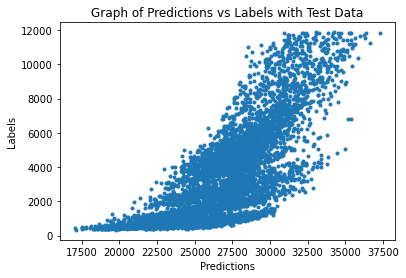

In [27]:
import matplotlib.pyplot as plt
import os

test_result = model.evaluate(x_test,y_test,batch_size=BATCH_SIZE)
print(f"Test loss = {test_result[0]}")
print(f"Test MAE = {test_result[1]}")
print(f"Test MSE = {test_result[2]}")

predictions = np.squeeze(model.predict(x_test))
labels = np.squeeze(y_test)
plt.plot(predictions,labels,".")
plt.xlabel("Predictions")
plt.ylabel("Labels")
plt.title("Graph of Predictions vs Labels with Test Data")
save_path = r"C:\Users\Muhamad Siddiq\Desktop\SHRDC\GitHub-Repo\Diamond Price Prediction"
plt.savefig(os.path.join(save_path,"result.png"),bbox_inches='tight')
plt.show()